In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

from util import add_fill_lines

In [2]:
font = {'weight' : 'normal', 'size' : 15}

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

plt.rc('font', **font)

In [3]:
colors = {}

colors['Bio-CCA'] = 'tab:blue'
colors['MSG-CCA'] = 'tab:orange'
colors['Gen-Oja'] = 'tab:green'
colors['Asymmetric-CCA'] = 'tab:red'
colors['Bio-RRR'] = 'tab:purple'

In [4]:
styles = {}

styles['Bio-CCA'] = 'solid'
styles['MSG-CCA'] = 'dashed'
styles['Gen-Oja'] = 'dotted'
styles['Asymmetric-CCA'] = 'dashdot'
styles['Bio-RRR'] = 'dashed'

In [5]:
labels = {}

labels['Bio-CCA'] = 'Bio-CCA'
labels['MSG-CCA'] = 'MSG-CCA'
labels['Gen-Oja'] = 'Gen-Oja'
labels['Asymmetric-CCA'] = 'Asym-NN'
labels['Bio-RRR'] = 'Bio-RRR'

### Synthetic plots

In [6]:
synthetic_error_1 = pkl.load(open('error/synthetic_1-dim_objective_error.p', 'rb'))
synthetic_subspacex_error_1 = pkl.load(open('error/synthetic_1-dim_subspacex_error.p', 'rb'))
synthetic_time_1 = pkl.load(open('error/synthetic_1-dim_time.p', 'rb'))
synthetic_error_2 = pkl.load(open('error/synthetic_2-dim_objective_error.p', 'rb'))
synthetic_subspacex_error_2 = pkl.load(open('error/synthetic_2-dim_subspacex_error.p', 'rb'))
synthetic_time_2 = pkl.load(open('error/synthetic_2-dim_time.p', 'rb'))
synthetic_error_4 = pkl.load(open('error/synthetic_4-dim_objective_error.p', 'rb'))
synthetic_subspacex_error_4 = pkl.load(open('error/synthetic_4-dim_subspacex_error.p', 'rb'))
synthetic_time_4 = pkl.load(open('error/synthetic_4-dim_time.p', 'rb'))

In [7]:
domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))

KeyError: 'Bio-CCA'

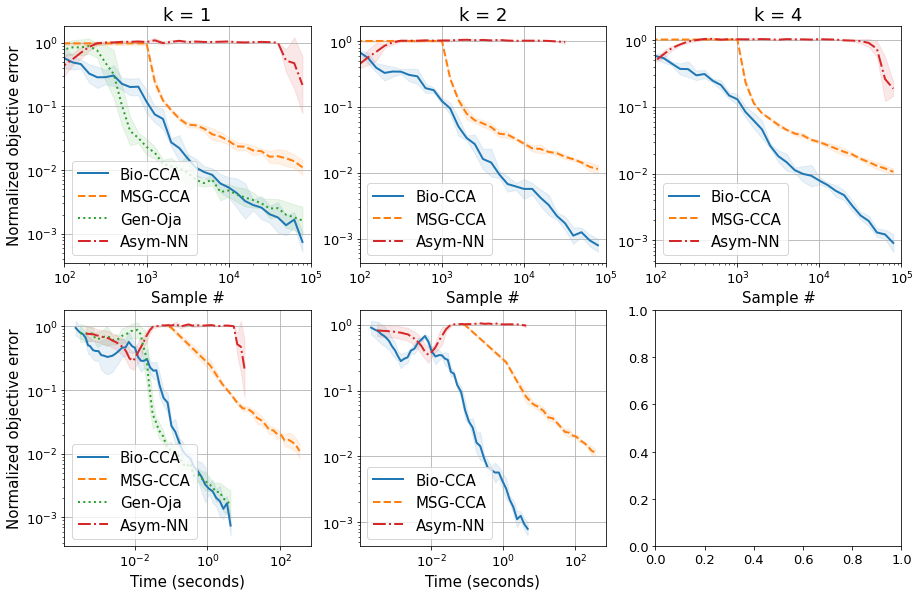

In [8]:
algorithms = ['Bio-CCA','MSG-CCA','Gen-Oja','Asymmetric-CCA','Bio-RRR']

linewidth = 2

iters = 100000

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,20))

ax = plt.subplot(4, 3, 1)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, domain, synthetic_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 2)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 3)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 4")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 4)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, np.mean(synthetic_time_1[alg][:,domain],axis=0), synthetic_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 5)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_2[alg][:,domain],axis=0), synthetic_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 6)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_4[alg][:,domain],axis=0), synthetic_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 7)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, domain, synthetic_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})
        
ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 8)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 9)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, synthetic_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 10)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, np.mean(synthetic_time_1[alg][:,domain],axis=0), synthetic_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 11)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_2[alg][:,domain],axis=0), synthetic_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 12)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(synthetic_time_4[alg][:,domain],axis=0), synthetic_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

plt.savefig(f'plots/synthetic.png', dpi=300, transparent='true', bbox_inches='tight')

### Mediamill plots

In [150]:
mediamill_error_1 = pkl.load(open(f'error/mediamill_1-dim_objective_error.p', 'rb'))
mediamill_subspacex_error_1 = pkl.load(open(f'error/mediamill_1-dim_subspacex_error.p', 'rb'))
mediamill_time_1 = pkl.load(open(f'error/mediamill_1-dim_time.p', 'rb'))
mediamill_error_2 = pkl.load(open(f'error/mediamill_2-dim_objective_error.p', 'rb'))
mediamill_subspacex_error_2 = pkl.load(open(f'error/mediamill_2-dim_subspacex_error.p', 'rb'))
mediamill_time_2 = pkl.load(open(f'error/mediamill_2-dim_time.p', 'rb'))
mediamill_error_4 = pkl.load(open(f'error/mediamill_4-dim_objective_error.p', 'rb'))
mediamill_subspacex_error_4 = pkl.load(open(f'error/mediamill_4-dim_subspacex_error.p', 'rb'))
mediamill_time_4 = pkl.load(open(f'error/mediamill_4-dim_time.p', 'rb'))

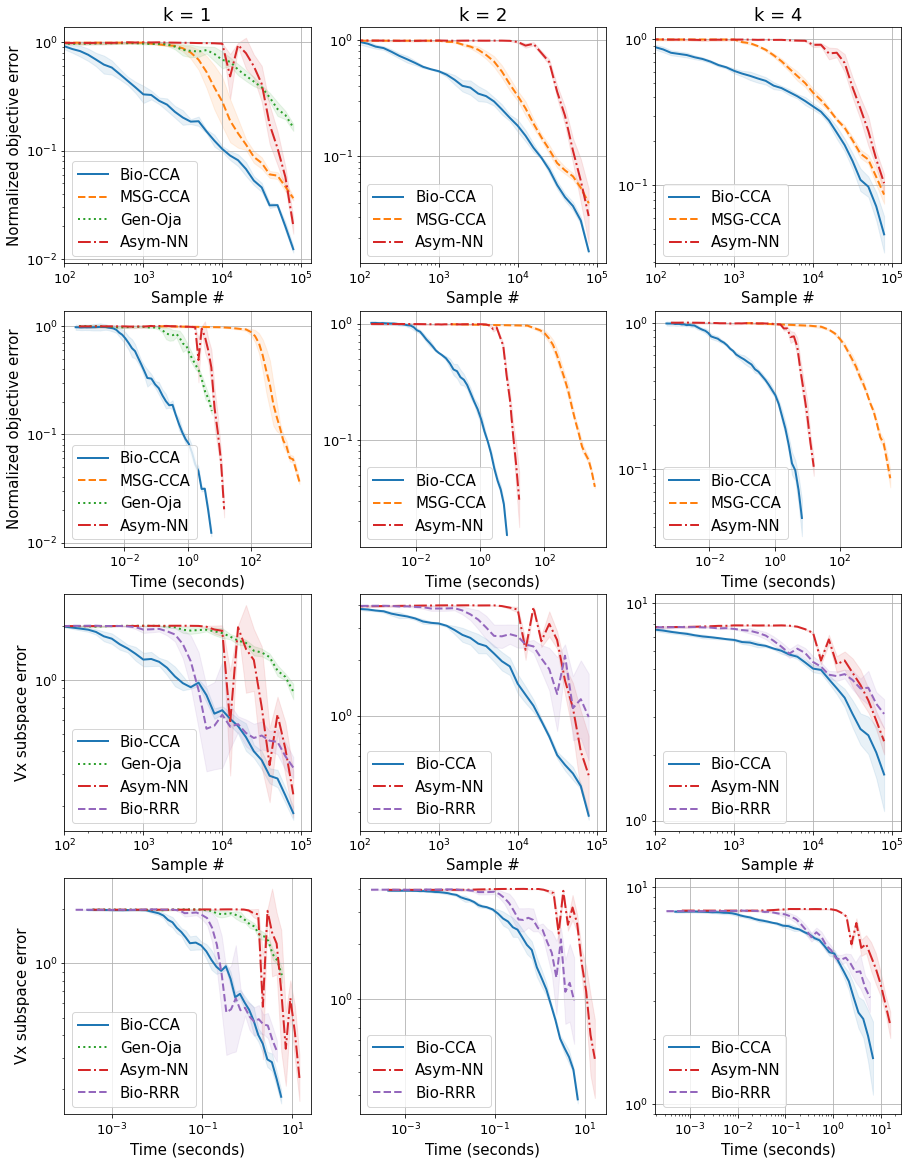

In [153]:
algorithms = ['Bio-CCA','MSG-CCA','Gen-Oja','Asymmetric-CCA','Bio-RRR']

linewidth = 2

iters = 43907*3

domain = list(sorted(set(map(int, np.round(np.logspace(0, 5, num=50, endpoint=False))))))
domain_len = len(domain)

fig = plt.figure(figsize=(15,20))

ax = plt.subplot(4, 3, 1)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, domain, mediamill_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 1")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 2)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 2")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 3)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.title(f"k = 4")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 4)

for alg in algorithms:
    if alg!='Bio-RRR':
        add_fill_lines(ax, np.mean(mediamill_time_1[alg][:,domain],axis=0), mediamill_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized objective error')

ax = plt.subplot(4, 3, 5)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_2[alg][:,domain],axis=0), mediamill_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 6)

for alg in algorithms:
    if alg!='Bio-RRR' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_4[alg][:,domain],axis=0), mediamill_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 7)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, domain, mediamill_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})
        
ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 8)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')

ax = plt.subplot(4, 3, 9)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, domain, mediamill_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlim((1e2,iters))
plt.xlabel('Sample #')
plt.ylim((9e-1,1.1e1))

ax = plt.subplot(4, 3, 10)

for alg in algorithms:
    if alg!='MSG-CCA':
        add_fill_lines(ax, np.mean(mediamill_time_1[alg][:,domain],axis=0), mediamill_subspacex_error_1[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylabel('Vx subspace error')

ax = plt.subplot(4, 3, 11)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_2[alg][:,domain],axis=0), mediamill_subspacex_error_2[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')

ax = plt.subplot(4, 3, 12)

for alg in algorithms:
    if alg!='MSG-CCA' and alg!='Gen-Oja':
        add_fill_lines(ax, np.mean(mediamill_time_4[alg][:,domain],axis=0), mediamill_subspacex_error_4[alg][:,domain], plot_kwargs={'ls': styles[alg], 'lw': linewidth, 'label': labels[alg], 'color': colors[alg]}, ci_kwargs={'color': colors[alg]})

ax.loglog()

plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Time (seconds)')
plt.ylim((9e-1,1.1e1))

plt.savefig(f'plots/mediamill.png', dpi=300, transparent='true', bbox_inches='tight')